In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score


%matplotlib inline 

In [7]:
insuranceDF = pd.read_csv('insurance.csv')

In [8]:
insuranceDF.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
insuranceDF.duplicated().sum()

1

In [11]:
insuranceDF.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [12]:
insuranceDF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
insuranceDF.drop_duplicates(inplace = True)

In [14]:
insuranceDF

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [15]:
insuranceDF.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


<AxesSubplot:>

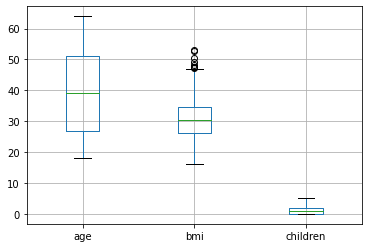

In [16]:
insuranceDF.drop(columns = "expenses").boxplot()

In [17]:
for col_name in insuranceDF.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = insuranceDF[col_name].quantile(0.25)
    q3 = insuranceDF[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",insuranceDF.loc[(insuranceDF[col_name] < low) | (insuranceDF[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)


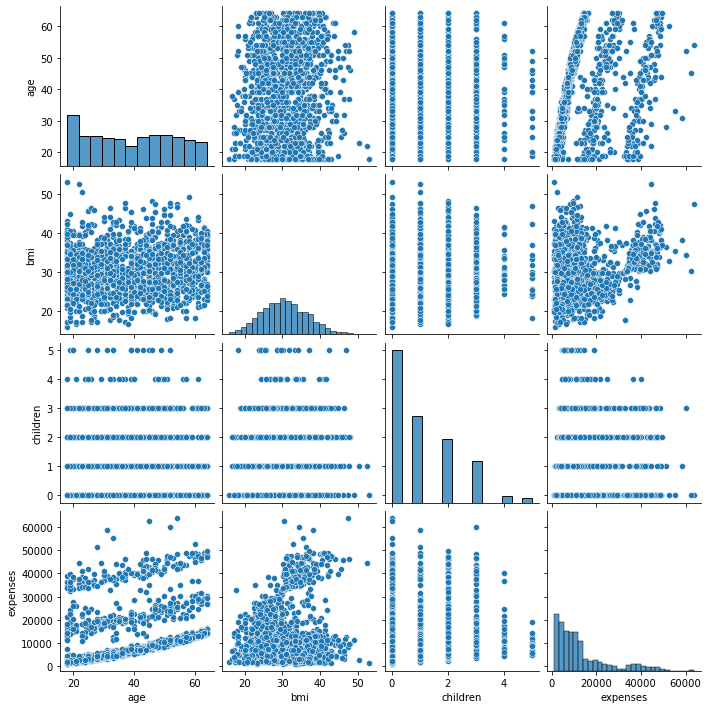

In [18]:
sns.pairplot(insuranceDF)

In [19]:
insuranceDF.value_counts()

age  sex     bmi   children  smoker  region     expenses
18   female  20.8  0         no      southeast  1607.51     1
48   female  27.4  1         no      northeast  9447.38     1
             25.9  3         yes     southeast  24180.93    1
             22.8  0         no      southwest  8269.04     1
47   male    47.5  1         no      southeast  8083.92     1
                                                           ..
31   female  25.7  0         no      southeast  3756.62     1
             23.6  2         no      southwest  4931.65     1
             21.8  0         no      northwest  4134.08     1
30   male    44.2  2         no      southeast  4266.17     1
64   male    40.5  0         no      southeast  13831.12    1
Length: 1337, dtype: int64

In [20]:
insuranceDF.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

In [21]:
insuranceDF['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [22]:
insuranceDF["region"].replace({
    'southeast': 3,
    'southwest': 4,
    'northeast': 1,
    'northwest': 0
}, inplace=True)

In [23]:
insuranceDF['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [24]:
insuranceDF["sex"].replace({
    'male': 1,
    'female': 0
}, inplace=True)

In [25]:
insuranceDF

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,4,16884.92
1,18,1,33.8,1,no,3,1725.55
2,28,1,33.0,3,no,3,4449.46
3,33,1,22.7,0,no,0,21984.47
4,32,1,28.9,0,no,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,0,10600.55
1334,18,0,31.9,0,no,1,2205.98
1335,18,0,36.9,0,no,3,1629.83
1336,21,0,25.8,0,no,4,2007.95


In [26]:
insuranceDF['smoker'].value_counts()
insuranceDF["smoker"].replace({
    'no': 1,
    'yes': 0
}, inplace=True)

In [27]:
#we are removing job column because we have done label encoding before
numerical_data = insuranceDF.select_dtypes(include=np.number)

In [28]:
numerical_data

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,4,16884.92
1,18,1,33.8,1,1,3,1725.55
2,28,1,33.0,3,1,3,4449.46
3,33,1,22.7,0,1,0,21984.47
4,32,1,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,0,10600.55
1334,18,0,31.9,0,1,1,2205.98
1335,18,0,36.9,0,1,3,1629.83
1336,21,0,25.8,0,1,4,2007.95


In [29]:
categorical_data = insuranceDF.select_dtypes(exclude=np.number)

In [30]:
categorical_data

""
0
1
2
3
4
...
1333
1334
1335
1336


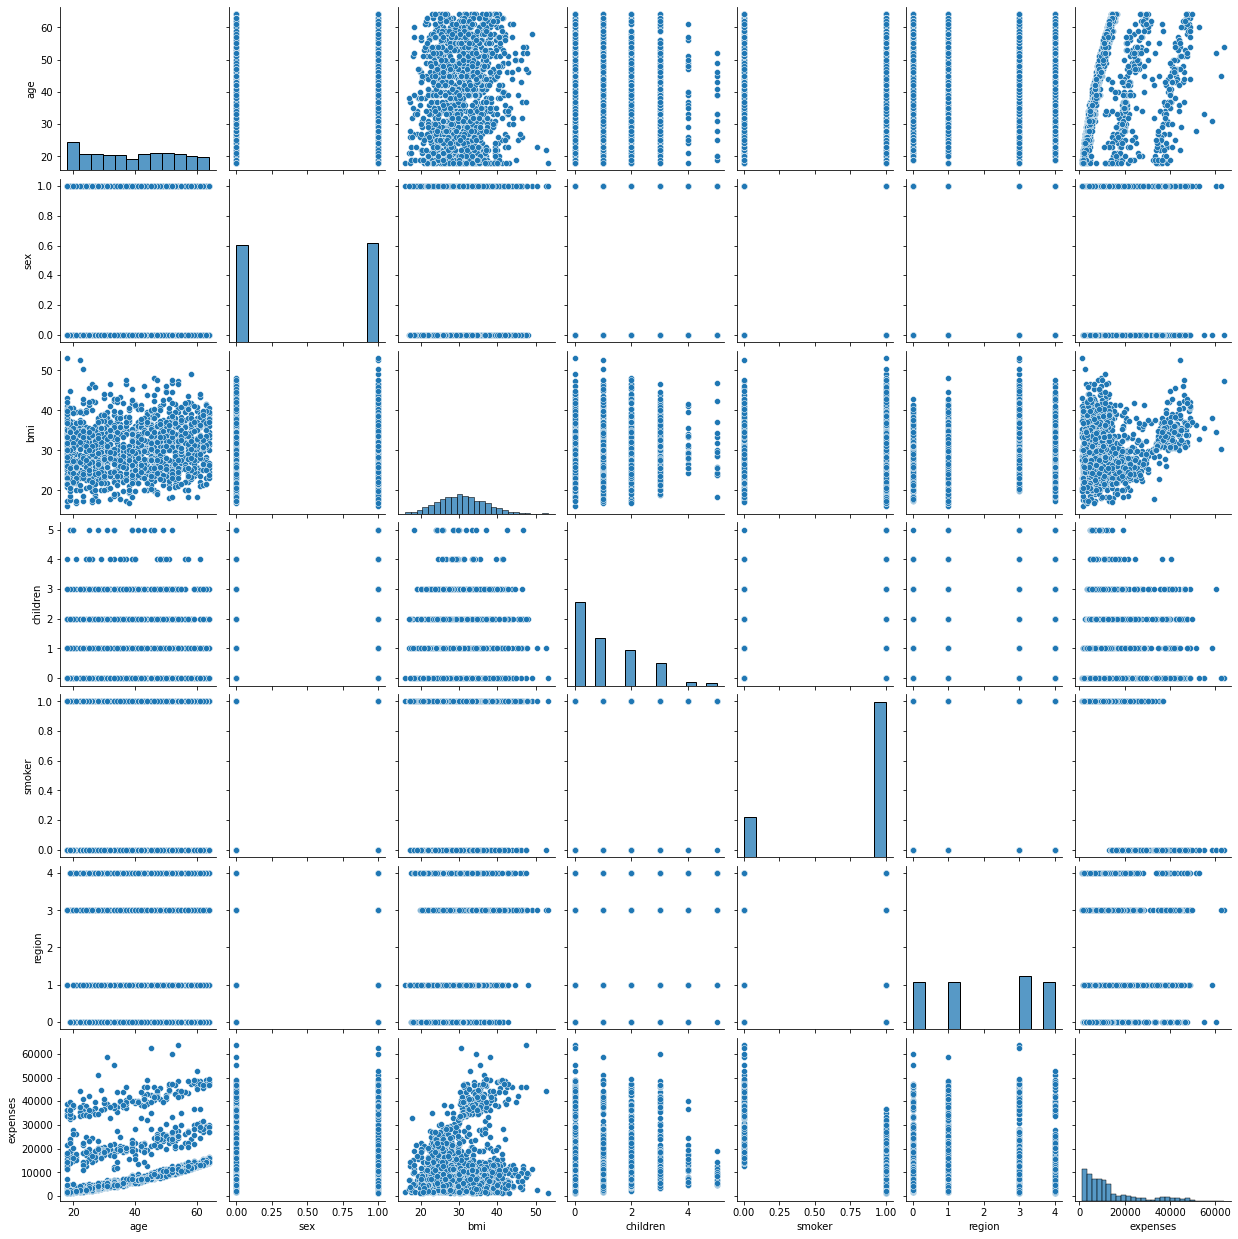

In [31]:
sns.pairplot(insuranceDF)

In [32]:
insuranceDF.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.109414,0.041536,0.025587,0.000329,0.298308
sex,-0.019814,1.000000,0.046405,0.017848,-0.076596,0.010307,0.058045
bmi,0.109414,0.046405,1.000000,0.012641,-0.003964,0.185469,0.198637
children,0.041536,0.017848,0.012641,1.000000,-0.007331,-0.002781,0.067389
smoker,0.025587,-0.076596,-0.003964,-0.007331,1.000000,-0.018202,-0.787234
region,0.000329,0.010307,0.185469,-0.002781,-0.018202,1.000000,0.016547
expenses,0.298308,0.058045,0.198637,0.067389,-0.787234,0.016547,1.000000


<AxesSubplot:>

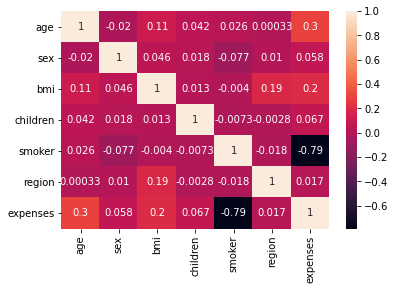

In [33]:
sns.heatmap(insuranceDF.corr(), annot=True)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
X = insuranceDF.drop(columns="expenses")

In [36]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature        VIF
0       age   7.762992
1       sex   1.985617
2       bmi  12.184223
3  children   1.802330
4    smoker   4.372743
5    region   2.762784


In [37]:
y = insuranceDF["expenses"]

In [38]:
model = LinearRegression()

In [39]:
model.fit(X,y)

LinearRegression()

In [40]:
model.coef_

array([   257.15940547,   -127.25259642,    333.25229245,    472.79791954,
       -23836.00078814,   -223.80721085])

In [41]:
model.intercept_

11925.388810971817

In [42]:
y_pred = model.predict(X)

In [43]:
y_pred

array([25213.92763076,  3656.30849656,  6906.89655636, ...,
        4343.84528002,  1192.41583941, 37309.75425477])

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
print("MSE : ",mean_squared_error(y,y_pred))
print("MAE : ",mean_absolute_error(y,y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

MSE :  36582209.807625435
MAE :  4182.608135203404
RMSE :  6048.322892143361
MAPE :  42.34719450245702


In [46]:
def linear_best_fit(X,y):
    model = LinearRegression()
    model.fit(X,y)
    y_pred = model.predict(X)
    print("MSE : ",mean_squared_error(y,y_pred))
    print("MAE : ",mean_absolute_error(y,y_pred))
    print("RMSE : ",np.sqrt(mean_squared_error(y,y_pred)))
    print("MAPE : ",mean_absolute_percentage_error(y,y_pred))

def mean_absolute_percentage_error(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [47]:
linear_best_fit(X,y)

MSE :  36582209.807625435
MAE :  4182.608135203404
RMSE :  6048.322892143361
MAPE :  42.34719450245702


In [48]:
X = insuranceDF.drop(columns=["bmi","expenses"])

In [49]:
linear_best_fit(X,y)

MSE :  40511742.09863798
MAE :  4083.260476099102
RMSE :  6364.883510217448
MAPE :  32.11388441916692


In [50]:
# its not reducing the error if in case we remove more columns. So removing bmi makes sense.
# smoker correlation is very less with expenses, but seems to increase the error if not included.
X = insuranceDF.drop(columns=["bmi","region","sex","expenses"])

In [51]:
linear_best_fit(X,y)

MSE :  40513347.214904614
MAE :  4083.1795764184094
RMSE :  6365.009600535149
MAPE :  32.003328631693655


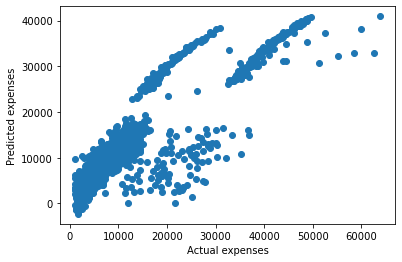

In [52]:
plt.xlabel("Actual expenses")
plt.ylabel("Predicted expenses")

plt.scatter(y, y_pred)

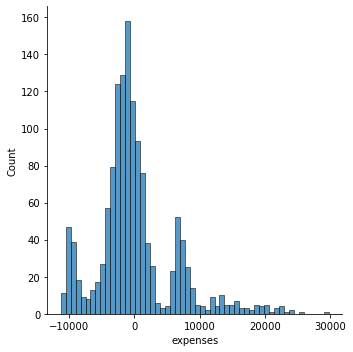

In [53]:
error = y-y_pred
sns.displot(error)

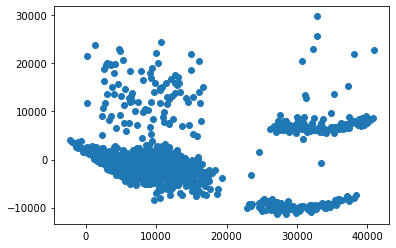

In [54]:
error = y-y_pred
plt.scatter( y_pred, error)

(array([ 80., 290., 332., 287.,  73.,   6.,  51.,  93.,  77.,  48.]),
 array([-2300.76580685,  2022.98414741,  6346.73410167, 10670.48405593,
        14994.23401018, 19317.98396444, 23641.7339187 , 27965.48387295,
        32289.23382721, 36612.98378147, 40936.73373573]),
 <BarContainer object of 10 artists>)

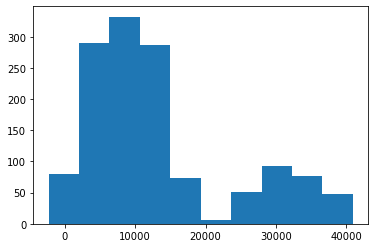

In [55]:
plt.hist(y_pred)

In [56]:
# it doesnt satisfy 3-4 assumptions of linear regression. Not sure whether this dataset can use linear regression model. I will for now
# do the test and train for this data_set

In [57]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [58]:
X_train.head()

,age,children,smoker
589,38,1,1
261,20,1,0
744,50,0,1
1293,46,3,1
1294,58,0,1


In [59]:
X_test.head()

,age,children,smoker
1247,33,4,1
810,46,3,1
164,37,0,1
405,52,2,1
638,39,0,0


In [60]:
y_train

589      5976.83
261     17085.27
744      8827.21
1293     9301.89
1294    11931.13
          ...   
570      3761.29
452      1969.61
680      2585.27
672      4399.73
670      4837.58
Name: expenses, Length: 935, dtype: float64

In [61]:
y_test

1247     6059.17
810      9414.92
164      5028.15
405     11396.90
638     20149.32
          ...   
154      7077.19
1229    11938.26
1136     7623.52
518      5240.77
318      7421.19
Name: expenses, Length: 402, dtype: float64

In [62]:
kf = KFold(n_splits=10)

In [63]:
X.isnull().sum()

age         0
children    0
smoker      0
dtype: int64

In [64]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [65]:
insuranceDF

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,4,16884.92
1,18,1,33.8,1,1,3,1725.55
2,28,1,33.0,3,1,3,4449.46
3,33,1,22.7,0,1,0,21984.47
4,32,1,28.9,0,1,0,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,1,0,10600.55
1334,18,0,31.9,0,1,1,2205.98
1335,18,0,36.9,0,1,3,1629.83
1336,21,0,25.8,0,1,4,2007.95


In [66]:
i=1
test_result = []
for train_index, test_index in kf.split(X):
    train_X = X.iloc[train_index]
    train_y = y.iloc[train_index]
    test_X = X.iloc[test_index]
    test_y = y.iloc[test_index]
    
    model = LinearRegression()
    model.fit(train_X, train_y)

    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    
    train_mape = np.sqrt(mean_squared_error(train_y, train_pred))
    test_mape = np.sqrt(mean_squared_error(test_y, test_pred))
    print("Train MAPE = ",train_mape)
    print("Test MAPE = ",test_mape)
    
    test_result.append(test_mape)

Train MAPE =  6376.390752963239
Test MAPE =  6266.582901674495
Train MAPE =  6352.651826816877
Test MAPE =  6481.582593161985
Train MAPE =  6381.182021096798
Test MAPE =  6225.108118944787
Train MAPE =  6349.521949591905
Test MAPE =  6528.905537850312
Train MAPE =  6322.115316452674
Test MAPE =  6756.199163072785
Train MAPE =  6461.620194304798
Test MAPE =  5435.24824949539
Train MAPE =  6416.661425637946
Test MAPE =  5884.521548509294
Train MAPE =  6252.884303323488
Test MAPE =  7313.064118825088
Train MAPE =  6402.064506297793
Test MAPE =  6039.59831252507
Train MAPE =  6319.998623026252
Test MAPE =  6773.2051018491575


In [67]:
np.mean(test_result)

6370.401564590837

In [68]:
np.std(test_result)

498.9086392203493

In [69]:
6370.401564590836 - 498.908639220349, 6370.401564590836 + 498.908639220349

(5871.492925370487, 6869.310203811185)

In [70]:
model = LinearRegression()
np.mean(np.abs(cross_val_score(model, X, y, scoring = 'neg_root_mean_squared_error', cv = 10)))

6370.401564590837

In [71]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [72]:
import sklearn
sklearn.__version__

'0.24.1'

In [73]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.3, random_state=90)

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
train_pred = model.predict(X_train)

In [76]:
test_pred = model.predict(X_test)

In [77]:
np.sqrt(mean_squared_error(y_train, train_pred))

6265.485302154202

In [78]:
np.sqrt(mean_squared_error(y_test, test_pred))

6601.611862687064

In [79]:
((6601.611862687064-6265.485302154202)/6601.611862687064)*100
# there seems to be diff of 5%. What to do in this case. Can we ignore. But its not following linear regression assumptions

5.091583200046657

In [80]:
r2 = r2_score(y_train, train_pred)

In [81]:
r2

0.7191300691727069

In [82]:
X_train.shape

(935, 3)

In [83]:
X_test

,age,children,smoker
1247,33,4,1
810,46,3,1
164,37,0,1
405,52,2,1
638,39,0,0
...,...,...,...
154,40,1,1
1229,58,0,1
1136,44,1,1
518,35,1,1


In [84]:
n, p = X_train.shape[0], X_train.shape[1]

In [85]:
adjr2 = 1-(((1-r2)*(n-1))/(n-p-1))

In [86]:
adjr2

0.7182250103193429